In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [6]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='E'
#ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
#ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}.nc'.format(tag)]
tdirlist = [tdir]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'Run{}'.format(tag))
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'Run{}'.format(tag))
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [7]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [8]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [9]:
print(inverse.invlist[0].get_time(2))
print(inverse.invlist[0].get_time(4))

2020-10-21 21:00:00
2020-10-21 23:00:00


In [10]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunE
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunE
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [13]:
inva = inverse.invlist[0]
inva.cdump.ens.values

array(['102119_2880', '102119_3880', '102119_4880', '102119_5880',
       '102119_6880', '102119_7880', '102119_8880', '102119_9880',
       '102119_10880', '102119_11880', '102119_12880', '102120_2880',
       '102120_3880', '102120_4880', '102120_5880', '102120_6880',
       '102120_7880', '102120_8880', '102120_9880', '102120_10880',
       '102120_11880', '102120_12880', '102121_2880', '102121_3880',
       '102121_4880', '102121_5880', '102121_6880', '102121_7880',
       '102121_8880', '102121_9880', '102121_10880', '102121_11880',
       '102121_12880', '102122_2880', '102122_3880', '102122_4880',
       '102122_5880', '102122_6880', '102122_7880', '102122_8880',
       '102122_9880', '102122_10880', '102122_11880', '102122_12880',
       '102123_2880', '102123_3880', '102123_4880', '102123_5880',
       '102123_6880', '102123_7880', '102123_8880', '102123_9880',
       '102123_10880', '102123_11880', '102123_12880', '102200_2880',
       '102200_3880', '102200_4880', '102200_58

In [14]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [15]:
for tii in [1,2,3,4,5,6,7,8,9,10,11]:
    print('time {} : {}'.format(tii,inverse.invlist[0].get_time(tii)))


time 1 : 2020-10-21 20:00:00
time 2 : 2020-10-21 21:00:00
time 3 : 2020-10-21 22:00:00
time 4 : 2020-10-21 23:00:00
time 5 : 2020-10-22 00:00:00
time 6 : 2020-10-22 01:00:00
time 7 : 2020-10-22 02:00:00
time 8 : 2020-10-22 03:00:00
time 9 : 2020-10-22 04:00:00
time 10 : 2020-10-22 05:00:00
time 11 : 2020-10-22 06:00:00


In [16]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z


10 bezyE
tii 10


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


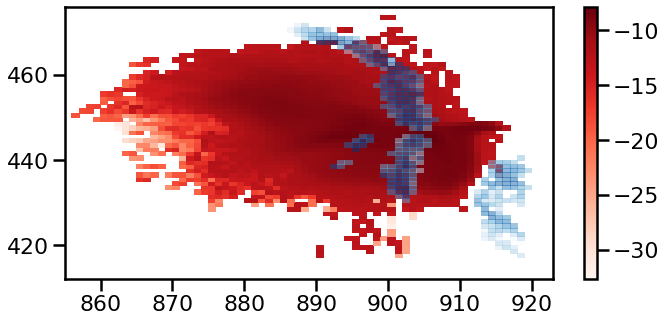

In [17]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index 'ensemble'
           #if None then sum along the ens. dimension which shows contributions from all inv. runs.
tii=10
#zlevel=None
%autoreload
ax = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel)
#plt.gca()
#ax.plot(160.587,55.978,'y^')
#plt.show()


In [18]:
%autoreload
inverse.set_concmult(1)

# Automatic Runs

In [19]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    print("HERE HERE HERE")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    print('HERE', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')


## Run with all previous and just two previous

tii [2, 3]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5
(2603, 45)
N_ctrl 44
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5/runE4.tcm_bezyE.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:844: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

bezyE
saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5/RunE_2_3_TFw5.csv
tii [2, 3, 4]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_TFw5
(4530, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_TFw5/runE4.tcm_bezyE.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:844: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_TFw5/RunE_2_3_4_TFw5.csv
tii [2, 3, 4, 5]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_TFw5
(6797, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_TFw5/RunE_2_3_4_5_TFw5.csv
tii [2, 3, 4, 5, 6]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_TFw5
(9849, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_TFw5/RunE_2_3_4_5_6_TFw5.csv
tii [2, 3, 4, 5, 6, 7]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_TFw5
(13310, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_TFw5/RunE_2_3_4_5_6_7_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_TFw5
(17081, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_TFw5/RunE_2_3_4_5_6_7_8_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_TFw5
(21016, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_TFw5/RunE_2_3_4_5_6_7_8_9_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_TFw5
(24969, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_TFw5/RunE_2_3_4_5_6_7_8_9_10_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_11_TFw5
(29531, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_11_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_4_5_6_7_8_9_10_11_TFw5/RunE_2_3_4_5_6_7_8_9_10_11_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5
(2603, 45)
N_ctrl 44
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_2_3_TFw5/RunE_2_3_TFw5.csv
HERE HERE HERE
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_3_4_TFw5
(3438, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_3_4_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_3_4_TFw5/RunE_3_4_TFw5.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_4_5_TFw5
(4194, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_4_5_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_4_5_TFw5/RunE_4_5_TFw5.csv
HERE HERE HERE
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_5_6_TFw5
(5319, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_5_6_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_5_6_TFw5/RunE_5_6_TFw5.csv
HERE HERE HERE
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_6_7_TFw5
(6513, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_6_7_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_6_7_TFw5/RunE_6_7_TFw5.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_7_8_TFw5
(7232, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_7_8_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_7_8_TFw5/RunE_7_8_TFw5.csv
HERE HERE HERE
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_8_9_TFw5
(7706, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_8_9_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_8_9_TFw5/RunE_8_9_TFw5.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_9_10_TFw5
(7888, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_9_10_TFw5/runE4.tcm_bezyE.txt
bezyE


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_9_10_TFw5/RunE_9_10_TFw5.csv
HERE HERE HERE
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunH/RunE_10_11_TFw5
(8515, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunE_10_11_TFw5/runE4.tcm_bezyE.txt
bezyE
saving to  /hysplit-users/alicec/projects/bezy/RunH/RunE_10_11_TFw5/RunE_10_11_TFw5.csv


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


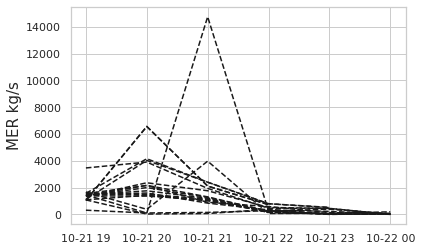

In [21]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

tiilist = [[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

## For comparision with RunC

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
(2671, 45)
N_ctrl 44
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TFw5/runB4.tcm_bezyB.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:844: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

bezyB
saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TFw5/RunB_2_3_TFw5.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
(4904, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TFw5/runB4.tcm_bezyB.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:844: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TFw5/RunB_2_3_4_TFw5.csv
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
(9043, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TFw5/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TFw5/RunB_4_5_6_TFw5.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
(202, 45)
N_ctrl 44
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TT/RunB_2_3_TT.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
(421, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TT/RunB_2_3_4_TT.csv
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
(610, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TT/RunB_4_5_6_TT.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
(2933, 45)
N_ctrl 44
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TF/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TF/RunB_2_3_TF.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
(5381, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF/RunB_2_3_4_TF.csv
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
(9846, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TF/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_4_5_6_TF/RunB_4_5_6_TF.csv
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
(10153, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TFw7/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TFw7/RunB_7_8_TFw7.csv
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(22704, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TFw7/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TFw7/RunB_9_10_11_TFw7.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(44060, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TFw7/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TFw7/RunB_2_3_4_5_6_7_8_9_10_11_TFw7.csv
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
(583, 64)
N_ctrl 63
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TT/RunB_7_8_TT.csv
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(958, 64)
N_ctrl 63
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TT/RunB_9_10_11_TT.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(2353, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TT/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TT/RunB_2_3_4_5_6_7_8_9_10_11_TT.csv
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
(11308, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TF/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_7_8_TF/RunB_7_8_TF.csv
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(24997, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TF/runB4.tcm_bezyB.txt
bezyB


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_9_10_11_TF/RunB_9_10_11_TF.csv
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
(49084, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TF/runB4.tcm_bezyB.txt
bezyB
saving to  /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_5_6_7_8_9_10_11_TF/RunB_2_3_4_5_6_7_8_9_10_11_TF.csv


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  def make_tcm_mult(self,tiilist,remove_cols=True,remove_rows=True,


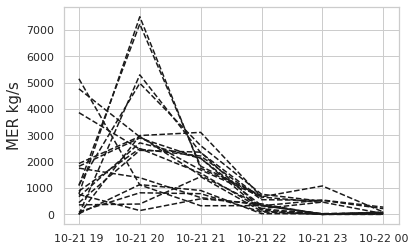

In [483]:
%autoreload
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11],
           [4,5,6]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    
    
tiilist = [[7,8],[9,10,11],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)  
    

# Looking at individual inversions

In [86]:
%autoreload
tii = [2,3,4,5,6,7,8,9,10,11]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:844: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

In [87]:
print(runtag)

RunH_2_3_4_5_6_7_8_9_10_11_TFw5


In [88]:
numpar = 20000  # number of particles released per hour.
delt = 5 # time step
tave = 1 # 1 h time average
hres = 0.1 # 0.1 degree horizontal resolution.
rate = 1 # 1 unit mass per hour
particle_mass = rate / numpar  #how much unit mass each particle has
area = (hres * 111e3)**2  # area in meters squared for mass loading grid.
mass_one = particle_mass / area  # unit mass / m2 for one particle in grid box.
mass_one_one = mass_one / (tave*60 / delt)  # smallest mass loading possible with one particle for one time step
print(mass_one_one)  # one particle for one time step
print(mass_one)      # one particle in area.

3.381760138516895e-14
4.0581121662202745e-13


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:984: RuntimeWarning: divide by zero encountered in log10
  cb = plt.pcolormesh(np.log10(self.tcm),cmap='tab20')


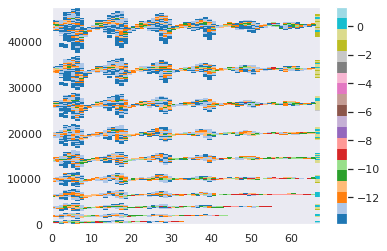

(47729, 67)

In [89]:
%autoreload
inverse.plot_tcm()
inverse.invlist[0].tcm.shape


In [90]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5'

In [91]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(47729, 67)
N_ctrl 66
output file /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5/runH4.tcm_zyH25.txt


In [92]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

zyH25


In [93]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

In [94]:
10**0.0007

1.001613109228309

zyH25


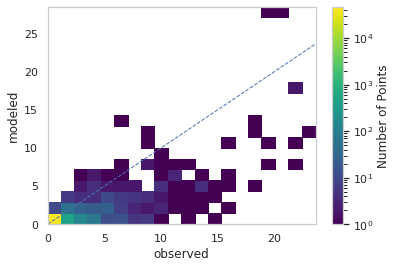

In [95]:
%autoreload
inverse.plot_outdat(eii=None)

In [96]:
print(inverse.make_tcm_names())
print(inverse.subdir)

(['zyH25_out.dat'], ['zyH25_out2.dat'])
/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5


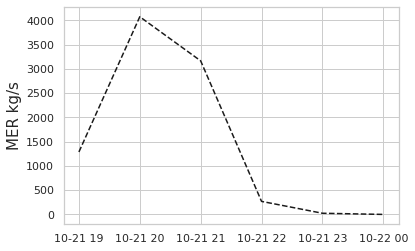

total 0.03173022914119394 Tg
saving to  /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5/RunH_2_3_4_5_6_7_8_9_10_11_TFw5.csv


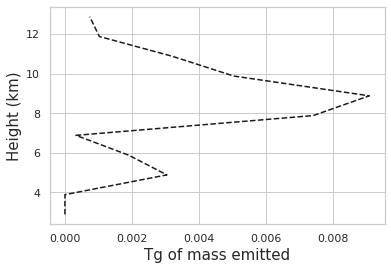

In [98]:
%autoreload

eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
plt.show()
inverse.plot_outdat_ts(eii,profile=True)
inverse.save_emis(runtag+'.csv')
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [44]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

bezyH


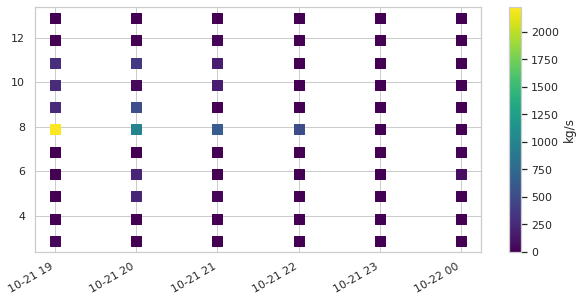

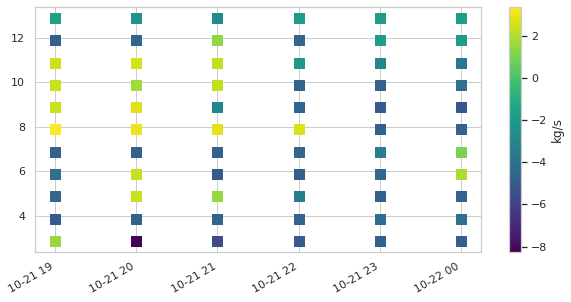

In [45]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [433]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '../',
 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/',
 'WORK_DIR': '/hysplit-users/alicec/tmp/',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python',
 'forecastDirectory': '/pub/forecast',
 'archivesDirectory': '/pub/archives',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/',
 'owner': 'A. Person',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'gfs0p25',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'timeres': 1,
 'rate': 1,
 'inv_vertical_resolution': 1000,
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatingPDF

In [434]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunB
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TFw5
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [435]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.
inverse.make_efile(vloc=vloc)

No meteorological files found /hysplit-users/alicec/projects/bezy/data/%Y%m%d/hysplit.t%Hz.gfs0p25f


writing efile {} /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TFw5/bezyB_emit.txt
gfs0p25
fcst str /pub/forecast/%Y%m%d/
making control file  gfs0p25
/hysplit-users/alicec/projects/bezy/data/
fcst str /hysplit-users/alicec/projects/bezy/data/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/20201021/hysplit.t18z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t00z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t06z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t12z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t18z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201023/hysplit.t00z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/202010

In [436]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std bezyB
in loop 0s procs 1
in loop 30s procs 1
in loop 60s procs 1
in loop 90s procs 1
in loop 120s procs 1
in loop 150s procs 1
in loop 180s procs 1
in loop 210s procs 1
in loop 240s procs 1
in loop 270s procs 1
in loop 300s procs 1
in loop 330s procs 1
in loop 360s procs 1
in loop 390s procs 1
in loop 420s procs 1
in loop 450s procs 0


# Creating netcdf files from cdump

In [128]:
from monetio.models import hysplit
blist = []

cdir = '/hysplit-users/alicec/projects/bezy/RunH/'
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]
name='cdump.zy{}25'.format(tag)
runtag = []
tag='H'
for tii in tiilist:
    r = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    runtag.append(r)
    print(r)

for tagname in runtag:
    blist.append((os.path.join(cdir,tagname,name),'gfs0p25',tagname))

runtag=[]
tiilist = [[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
for tii in tiilist:
    r = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    runtag.append(r)
    print(r)

for tagname in runtag:
    blist.append((os.path.join(cdir,tagname,name),'gfs0p25',tagname))

for b in blist: print(b)

RunH_2_3_TFw5
RunH_2_3_4_TFw5
RunH_2_3_4_5_TFw5
RunH_2_3_4_5_6_TFw5
RunH_2_3_4_5_6_7_TFw5
RunH_2_3_4_5_6_7_8_TFw5
RunH_2_3_4_5_6_7_8_9_TFw5
RunH_2_3_4_5_6_7_8_9_10_TFw5
RunH_2_3_4_5_6_7_8_9_10_11_TFw5
RunH_3_4_TFw5
RunH_4_5_TFw5
RunH_5_6_TFw5
RunH_6_7_TFw5
RunH_7_8_TFw5
RunH_8_9_TFw5
RunH_9_10_TFw5
RunH_10_11_TFw5
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_7_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_7_8_TFw5')
('/hysplit-users/alicec/projec

In [129]:
dset = hysplit.combine_dataset(blist,century=2000,verbose=True)
dset.to_netcdf('RunH_GFS.nc')


reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:00:00
sample time 2020-10-22 01:00:00  to  2020-10-22 01:00:00
sample time 2020-10-22 02:00:00  to  2020-10-22 02:00:00
sample time 2020-10-22 03:00:00  to  2020-10-22 03:00:00
sample time 2020-10-22 04:00:00  to  2020-10-22 04:00:00
sample time 2020-10-22 05:00:00  to  2020-10-22 05:00:00
sample time 2020-10-22 06:00:00  to  2020-10-22 06:00:00
sample time 2020-10-22 07:00:00  to  2020-10-22 07:00:00
sample time 2020-10-22 08:00:00  to  2020-10-22 08:00:00
sample time 2020-10-22 09:00:00  to  2020-10-22 09:00:00
sample time 2020-10-22 10:00:00  to  2020-10-22 10:00:00
sample time 2020-10-22 11:00:00  to  2020-10-22 11:00:00
sample time 2

sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:00:00
sample time 2020-10-22 01:00:00  to  2020-10-22 01:00:00
sample time 2020-10-22 02:00:00  to  2020-10-22 02:00:00
sample time 2020-10-22 03:00:00  to  2020-10-22 03:00:00
sample time 2020-10-22 04:00:00  to  2020-10-22 04:00:00
sample time 2020-10-22 05:00:00  to  2020-10-22 05:00:00
sample time 2020-10-22 06:00:00  to  2020-10-22 06:00:00
sampl

sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:0

sample time 2020-10-22 16:00:00  to  2020-10-22 16:00:00
sample time 2020-10-22 17:00:00  to  2020-10-22 17:00:00
sample time 2020-10-22 18:00:00  to  2020-10-22 18:00:00
sample time 2020-10-22 19:00:00  to  2020-10-22 19:00:00
sample time 2020-10-22 20:00:00  to  2020-10-22 20:00:00
sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_6_7_TFw5/cdump.zyH25
sample time 2

sample time 2020-10-22 12:00:00  to  2020-10-22 12:00:00
sample time 2020-10-22 13:00:00  to  2020-10-22 13:00:00
sample time 2020-10-22 14:00:00  to  2020-10-22 14:00:00
sample time 2020-10-22 15:00:00  to  2020-10-22 15:00:00
sample time 2020-10-22 16:00:00  to  2020-10-22 16:00:00
sample time 2020-10-22 17:00:00  to  2020-10-22 17:00:00
sample time 2020-10-22 18:00:00  to  2020-10-22 18:00:00
sample time 2020-10-22 19:00:00  to  2020-10-22 19:00:00
sample time 2020-10-22 20:00:00  to  2020-10-22 20:00:00
sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00

In [130]:
4.0/24.0

0.16666666666666666